# **Loan Credit Risk Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

In [2]:
df = pd.read_csv('load_data.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.sample(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
320810,320810,24716827,27159566,20000,20000,20000.0,36 months,10.99,654.68,B,B3,Senior Associate,< 1 year,MORTGAGE,95000.0,Source Verified,Aug-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,303xx,GA,12.57,0.0,Apr-07,0.0,51.0,NaN,10.0,0.0,15241,70.6,17.0,w,0.00,0.00,21819.61,21819.61,20000.00,1819.61,0.0,0.0,0.0,Jul-15,15272.81,NaN,Jul-15,0.0,51.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,170834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21600.0,NaN,NaN,NaN
266434,266434,33140096,35783309,3600,3600,3600.0,36 months,8.39,113.46,A,A5,owner,9 years,RENT,34800.0,Source Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,700xx,LA,9.28,0.0,May-89,0.0,64.0,66.0,11.0,1.0,2999,25.4,20.0,w,2306.16,2306.16,1586.76,1586.76,1293.84,292.92,0.0,0.0,0.0,Jan-16,113.46,Feb-16,Jan-16,0.0,64.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,3062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11800.0,NaN,NaN,NaN
366820,366820,18536000,20698622,15375,15375,15375.0,36 months,12.49,514.28,B,B5,Warehouse Manager,2 years,RENT,42900.0,Verified,Jun-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,328xx,FL,2.69,0.0,Sep-06,0.0,NaN,NaN,12.0,0.0,1942,53.9,14.0,w,0.00,0.00,17186.72,17186.72,15374.99,1811.73,0.0,0.0,0.0,Jan-16,441.28,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,40606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3600.0,NaN,NaN,NaN


# 1. Dataframe Info

In [3]:
# dimensi dataframe
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.drop('Unnamed: 0', axis=1,inplace=True)

### Define Target

In [7]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [8]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df['bad_flag'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

In [9]:
df['bad_flag'].value_counts()

0    415317
1     50968
Name: bad_flag, dtype: int64

Target sudah bukan merupakan multi label, dimana **0** adalah `good flag` dan **1** merupakan `bad flag`

In [11]:
# drop fitur loan_status
df.drop('loan_status',axis=1,inplace=True)

# 2. Data Cleaning

## 2.1 Handle Missing Value

In [13]:
df.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mt

In [14]:
# membuat function fillna
def fill_column_missing_values(df, column_name, method='mean'):
    if method == 'mean':
        filled_column = df[column_name].fillna(df[column_name].mean())
    elif method == 'median':
        filled_column = df[column_name].fillna(df[column_name].median())
    elif method == 'mode':
        filled_column = df[column_name].fillna(df[column_name].mode().iloc[0])
    elif method == 'ffill':
        filled_column = df[column_name].fillna(method='ffill')
    elif method == 'bfill':
        filled_column = df[column_name].fillna(method='bfill')
    else:
        raise ValueError("Metode yang dimasukkan tidak valid. Pilihan: 'mean', 'median', 'mode', 'ffill', 'bfill'.")
    
    return filled_column

In [15]:
df['emp_title'] = fill_column_missing_values(df, 'emp_title', method='mode')
df['emp_length'] = fill_column_missing_values(df, 'emp_length', method='mode')
df['title'] = fill_column_missing_values(df, 'title', method='mode')
df['delinq_2yrs'] = fill_column_missing_values(df, 'delinq_2yrs', method='mean')
df['earliest_cr_line'] = fill_column_missing_values(df, 'earliest_cr_line', method='mode')
df['inq_last_6mths'] = fill_column_missing_values(df, 'inq_last_6mths', method='mean')
df['mths_since_last_delinq'] = fill_column_missing_values(df, 'mths_since_last_delinq', method='median')
df['mths_since_last_record'] = fill_column_missing_values(df, 'mths_since_last_record', method='median')
df['open_acc'] = fill_column_missing_values(df, 'open_acc', method='median')
df['pub_rec'] = fill_column_missing_values(df, 'pub_rec', method='median')
df['revol_util'] = fill_column_missing_values(df, 'revol_util', method='mean')
df['total_acc'] = fill_column_missing_values(df, 'total_acc', method='median')
df['last_pymnt_d'] = fill_column_missing_values(df, 'last_pymnt_d', method='mode')
df['next_pymnt_d'] = fill_column_missing_values(df, 'next_pymnt_d', method='mode')
df['last_credit_pull_d'] = fill_column_missing_values(df, 'last_credit_pull_d', method='mode')
df['collections_12_mths_ex_med'] = fill_column_missing_values(df, 'collections_12_mths_ex_med', method='mean')
df['mths_since_last_major_derog'] = fill_column_missing_values(df, 'mths_since_last_major_derog', method='mean')
df['acc_now_delinq'] = fill_column_missing_values(df, 'acc_now_delinq', method='mean')
df['tot_coll_amt'] = fill_column_missing_values(df, 'tot_coll_amt', method='median')
df['tot_cur_bal'] = fill_column_missing_values(df, 'tot_cur_bal', method='mean')
df['total_rev_hi_lim'] = fill_column_missing_values(df, 'total_rev_hi_lim', method='mean')

In [16]:
df1 = df.copy()

In [17]:
df1.drop(['desc','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
          'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
          'inq_fi','total_cu_tl','inq_last_12m'],axis=1,inplace=True)

In [19]:
df1.dropna(inplace=True)

In [20]:
df1.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal 

## 2.2 Handle Duplicated Data

In [22]:
df1.duplicated().sum()

0

Tidak ada baris duplikat pada dataset

# 3. Exploratory Data Analysis

In [21]:
df1.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_flag
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,31.0,76.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-15,171.62,Feb-16,Jan-16,0.0,42.852547,1,INDIVIDUAL,0.0,0.0,138801.713385,30379.087771,0


In [24]:
# membagi fitur berdasarkan tipe data
numerical = df1[['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','recoveries','collection_recovery_fee','last_pymnt_amnt']]

categorical = df1[['grade','sub_grade','emp_title','bad_flag','home_ownership','verification_status',
          'initial_list_status','application_type']]

## 3.1 Univariate Analysis

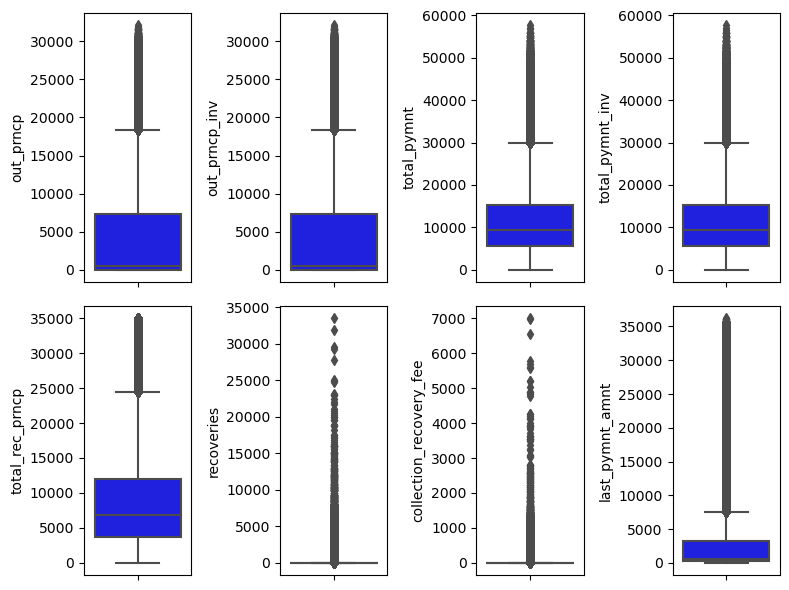

In [26]:
feat = numerical.columns  
plt.figure(figsize=(8,6))
for i in range(0, len(feat)):
  plt.subplot(2, 4, i+1)
  sns.boxplot(y=numerical[feat[i]], color='blue', orient='v')
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

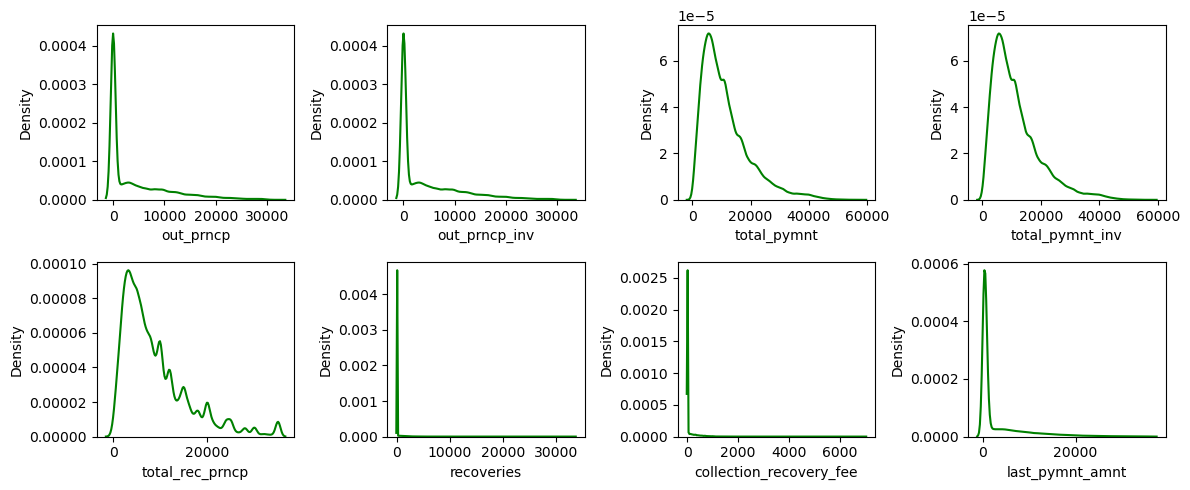

In [27]:
feat = numerical.columns  
plt.figure(figsize=(12,5))
for i in range(0, len(feat)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x = df1[feat[i]], color = 'green')
  plt.xlabel(feat[i])
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

## 3.2 Multivariate Analysis

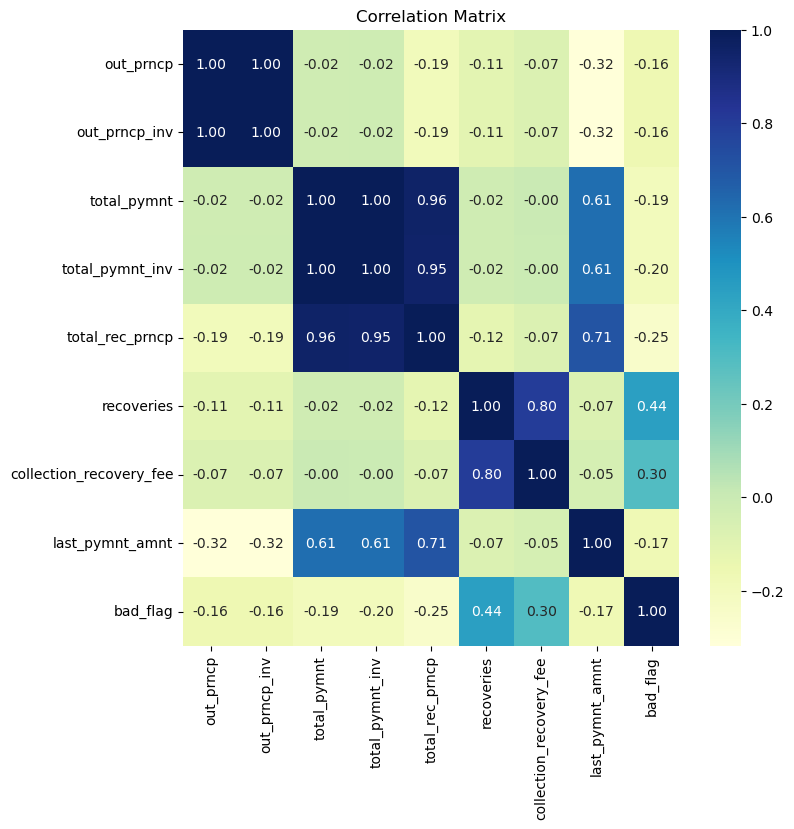

In [29]:
korelasi = df1[['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','recoveries','collection_recovery_fee','last_pymnt_amnt',
                'bad_flag','home_ownership']]

df1_x = korelasi
plt.figure(figsize=(8,8))
sns.heatmap(df1_x.corr(),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 3.3 Bivariate Analysis

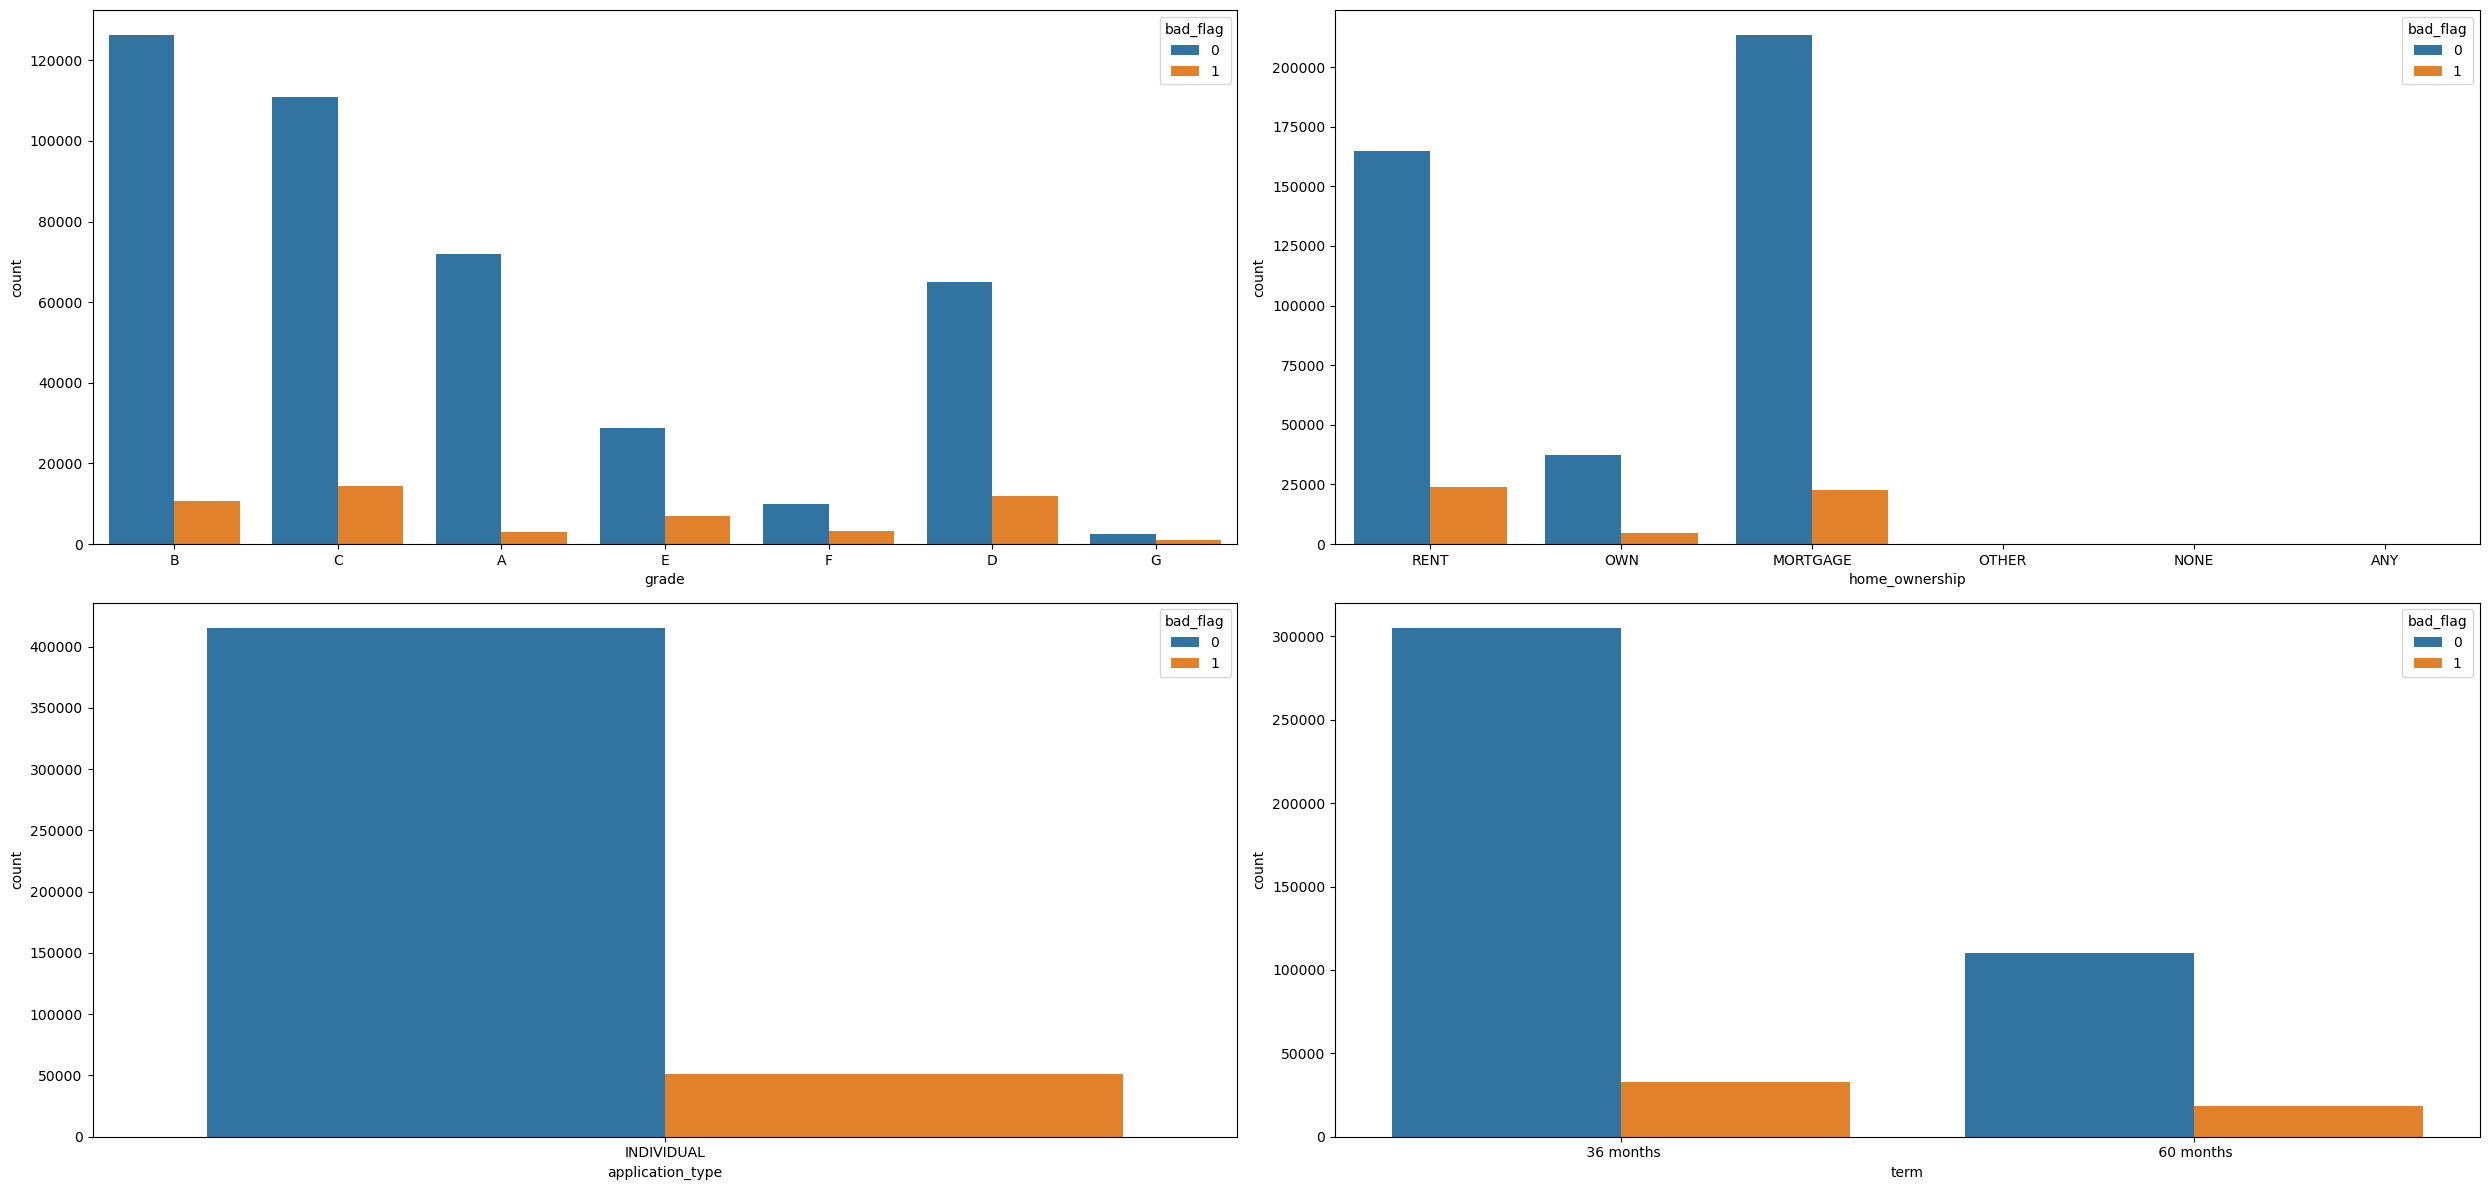

In [30]:
fig, axarr = plt.subplots(2, 2, figsize=(25, 12))
sns.countplot(x='grade', hue = 'bad_flag',data = df1, ax=axarr[0][0])
sns.countplot(x='home_ownership', hue = 'bad_flag',data = df1, ax=axarr[0][1])
sns.countplot(x='application_type', hue = 'bad_flag',data = df1, ax=axarr[1][0])
sns.countplot(x='term', hue = 'bad_flag',data = df1, ax=axarr[1][1])
plt.tight_layout()
plt.show()

1. **Grade** : Individu dengan **Grade B** merupakan peminjam dengan `good flag` yang paling tinggi dibandingan grade lainnya, disusul oleh **Grade C** dan **Grade A**. Sedangkan yang terendah ada pada **Grade G**. **Grade C** merupakan individu dengan `bad flag` terbanyak dibandingkan dengan grade lainnya bahkan lebih tinggi dari pada **Grade D**.

2. **Home Ownership** : Individu yang **menyicil rumah** merupakan golongan `good flag` yang tertinggi dibandingkan yang lainnya, hal ini mungkin terjadi karena mereka memiliki kawajiban untuk menyicil rumah sehingga tidak ingin gagal bayar dan diberhentikan pinjamannya oleh bank sehingga cenderung tidak pernah terlambat membayar sedangkan individu yang **memiliki rumah** sangat sedikit yang melakukan pinjaman kredit bahkan dari segi `good flag` dan `bad flag` merupakan yang terendah dibandingkan lainnya. Untuk `bad flag` tertinggi dimiliki oleh individu yang menyewa rumah hal ini mungkin terjadi kareta sebagian dari mereka belum memiliki finansial yang stabil sehingga cenderung terjadi gagal bayar.

3. **Application Type** : Pada pengajuan pinjaman, hanya terdapat 1 kategori yaitu **perorangan**. Semua peminjam merupakan perorangan dan bukan dari suatu kelompok atau perusahaan. Peminjam perorangan ini sangat banyak yang sudah melakukan pelunasan pinjaman dan saat ini tidak memiliki tunggakan. Peminjam perorangan yang dianggap tidak mampu membayar juga terbilang cukup sedikit.

4. **Term** : Terdapat 2 kategori durasi pembayaran yaitu **3 tahun** dan **5 tahun**. Peminjam dengan durasi **3 tahun** terbilang sangat tertib dalam melakukan pelunasan karena banyak yang telah melunasi pinjaman dan saat ini tidak memiliki tunggakan apapun, akan tetapi peminjam dengan durasi pembayaran 3 tahun cukup banyak yang dianggap tidak mampu membayar dibandingkan dengan peminjam dengan durasi pembayaran 5 tahun.

# 4. Data Pre-processing

## 4.1 Outlier Removal

In [32]:
# Hitung Q1 dan Q3
Q1 = df1[['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']].quantile(0.25)
Q3 = df1[['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Hitung Batas Bawah dan Batas Atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
df1_clean = df1[~((df1[['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                        'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 
                        'last_pymnt_amnt']] < lower_bound) | (df1[['out_prncp', 'out_prncp_inv', 'total_pymnt', 
                                                                   'total_pymnt_inv', 'total_rec_prncp', 'recoveries',
                                                                   'collection_recovery_fee', 'last_pymnt_amnt']] > upper_bound)).any(axis=1)]


In [33]:
df2 = df1_clean.copy()

## 4.2 Feature Selection

In [34]:
df2.drop(['id','member_id','sub_grade','emp_title','emp_length','issue_d','url','title','zip_code','addr_state','earliest_cr_line','revol_bal',
          'revol_util','total_rec_int','total_rec_late_fee','last_pymnt_d','next_pymnt_d','collections_12_mths_ex_med','mths_since_last_major_derog',
          'policy_code','application_type','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'],axis=1,inplace=True)

In [35]:
df2.drop('last_credit_pull_d',axis=1,inplace=True)

In [36]:
df2.sample(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_flag
120843,16000,16000,16000.0,36 months,13.05,539.49,B,MORTGAGE,125000.0,Source Verified,n,debt_consolidation,25.45,0.0,0.0,31.0,76.0,22.0,0.0,52.0,f,3119.27,3119.27,16181.69,16181.69,12880.73,0.0,0.0,539.49,0


## 4.3 Feature Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

def label_encode_column(df, column_name):
    le = LabelEncoder()
    df[column_name] = le.fit_transform(df[column_name])
    return df

In [39]:
df_encoded = label_encode_column(df2, 'term')
df_encoded = label_encode_column(df2, 'grade')
df_encoded = label_encode_column(df2, 'verification_status')
df_encoded = label_encode_column(df2, 'pymnt_plan')
df_encoded = label_encode_column(df2, 'initial_list_status')

In [41]:
onehot = pd.get_dummies(df2['home_ownership'],prefix = 'home')
df2 = df2.join(onehot)
df2.drop('home_ownership',axis=1,inplace=True)

In [42]:
onehot1 = pd.get_dummies(df2['purpose'],prefix = 'pur')
df2 = df2.join(onehot1)
df2.drop('purpose',axis=1,inplace=True)

In [47]:
bf = df2.pop('bad_flag')
df2['bad_flag'] = bf

In [49]:
df2.sample(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,pur_car,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_house,pur_major_purchase,pur_medical,pur_moving,pur_other,pur_renewable_energy,pur_small_business,pur_vacation,pur_wedding,bad_flag
72763,21725,21725,21725.0,1,9.99,446.15,1,75000.0,2,0,29.20,0.0,1.0,70.0,76.0,9.0,0.0,26.0,0,13164.76,13164.76,11793.31,11793.31,8560.24,0.0,0.0,446.15,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
261051,13000,13000,13000.0,1,20.99,351.63,4,116680.0,2,0,25.10,3.0,2.0,8.0,76.0,13.0,0.0,36.0,1,11048.38,11048.38,4907.66,4907.66,1951.62,0.0,0.0,351.63,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
301644,8025,8025,8025.0,0,16.99,286.08,3,49174.0,2,0,18.26,0.0,4.0,31.0,76.0,9.0,0.0,18.0,0,0.00,0.00,9297.83,9297.83,8025.00,0.0,0.0,6150.95,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## 4.4 Feature Transformation

In [50]:
df_std = df2.copy()

In [46]:
num = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc',
       'dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','total_acc',
       'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','recoveries','collection_recovery_fee','last_pymnt_amnt']

In [51]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in num:
    df_std[col] = ss.fit_transform(df_std[[col]])
    
display(df_std.shape, df_std.head(3))

(341207, 48)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,pur_car,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_house,pur_major_purchase,pur_medical,pur_moving,pur_other,pur_renewable_energy,pur_small_business,pur_vacation,pur_wedding,bad_flag
0,-1.042154,-1.040982,-1.032030,0,-0.642321,-1.020313,1,-0.888505,2,0,1.310367,-0.354382,0.212308,-0.100953,0.023979,-1.615110,-0.323471,-1.332629,0,-0.868375,-0.868337,-0.567991,-0.563039,-0.410423,0.0,0.0,-0.571416,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.433592,-1.433177,-1.419135,0,0.625795,-1.412462,2,-1.129557,0,0,-1.069475,-0.354382,1.146920,-0.100953,0.023979,-1.818673,-0.323471,-1.244928,0,-0.868375,-0.868337,-1.071900,-1.062856,-0.973768,0.0,0.0,-0.293776,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-0.289389,-0.286761,-0.276611,0,0.035918,-0.139351,2,-0.371437,1,0,0.348624,-0.354382,0.212308,0.167058,0.023979,-0.190170,-0.323471,1.122993,0,-0.868375,-0.868337,0.554524,0.567067,0.672933,0.0,0.0,-0.463527,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
df2.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,pur_car,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_house,pur_major_purchase,pur_medical,pur_moving,pur_other,pur_renewable_energy,pur_small_business,pur_vacation,pur_wedding,bad_flag
0,5000,5000,4975.0,0,10.65,162.87,1,24000.0,2,0,27.65,0.0,1.0,31.0,76.0,3.0,0.0,9.0,0,0.0,0.0,5861.071414,5831.78,5000.0,0.0,0.0,171.62,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,0,15.96,84.33,2,12252.0,0,0,8.72,0.0,2.0,31.0,76.0,2.0,0.0,10.0,0,0.0,0.0,3003.653644,3003.65,2400.0,0.0,0.0,649.91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10000,10000,10000.0,0,13.49,339.31,2,49200.0,1,0,20.00,0.0,1.0,35.0,76.0,10.0,0.0,37.0,0,0.0,0.0,12226.302210,12226.30,10000.0,0.0,0.0,357.48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# 5. Modelling (Classification)

In [53]:
df3 = df_std.copy()

## 5.1 Train Test Split

In [55]:
from sklearn.model_selection import train_test_split
x = df3.drop('bad_flag', axis=1)
y = df3['bad_flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
x_train.shape, x_test.shape

((272965, 47), (68242, 47))

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score',fontsize=16,fontweight='bold')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(x_train, y_train) 
eval_classification(logreg)

Accuracy (Test Set): 0.98
Precision (Test Set): 1.00
Recall (Test Set): 0.73
F1-Score (Test Set): 0.84
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.94


### Hyperparameter Tuning

In [62]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=0, cv=5, n_iter=50)
rs.fit(x_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.98
Precision (Test Set): 1.00
Recall (Test Set): 0.70
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.94


### Random Forest Classifier

In [63]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(x_train, y_train)
eval_classification(rfc)

Accuracy (Test Set): 0.94
Precision (Test Set): 1.00
Recall (Test Set): 0.22
F1-Score (Test Set): 0.36
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.88


### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.75
Recall (Test Set): 0.79
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00


## 5.3 Feature Importance

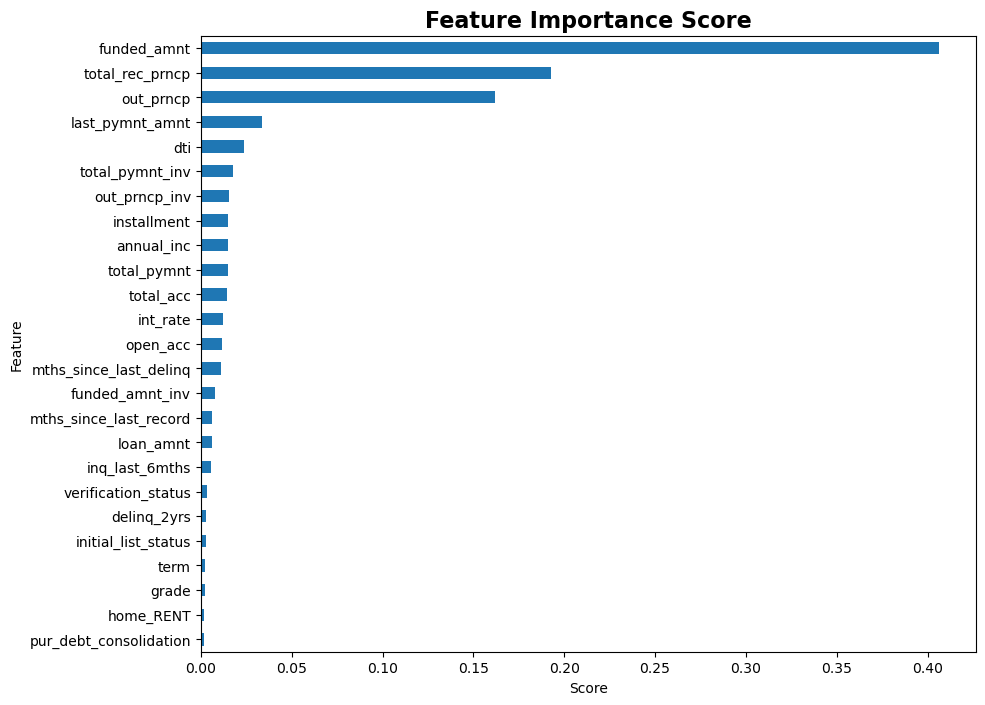

In [78]:
show_feature_importance(dt)

## 5.4 Summary

Berdasarkan model prediksi dan *feature importance* yang telah dibuat, disimpulkan bahwa algoritma yang sesuai yaitu `Logistic Regression` karena menghasilkan **recall** dan **F-1 Score** yang cukup tinggi, sedangkan pada algoritma lainnya metrik recall terbilang cukup rendah. Metrik recall digunakan karena kami berfokus pada **True Positive Rate** dan meminimalisir **False Negative** yang besar.<br> Pada *feature importance* ditetapkan threshold yaitu **0.05** sehingga fitur dengan score > **0.05** dianggap sebagai fitur yang berpengaruh terhadap target. Sehingga dihasilkan top 3 *feature importance* yaitu `funded amount`, `total rec prncp`, dan `out prncp`. 

## 5.5 Recommendations

1. **Funded Amount (Jumlah Dana yang Diberikan)**:
- Perhatikan besarnya jumlah dana yang diberikan kepada peminjam pada saat pemberian pinjaman. Jumlah ini mencerminkan tingkat risiko yang diambil oleh pemberi pinjaman, karena semakin besar jumlah dana yang diberikan, semakin besar juga risiko kredit yang dihadapi.
- Evaluasi kembali kebijakan penetapan jumlah dana pinjaman untuk memastikan bahwa tingkat risiko kreditnya sesuai dengan toleransi risiko perusahaan.

2. **Total Received Principal (Total Pokok yang Diterima)**:
- Monitor total pokok yang telah diterima dari peminjam hingga saat ini. Informasi ini membantu dalam memahami seberapa baik peminjam memenuhi kewajibannya dalam membayar kembali pinjaman.
- Analisis tren dalam total pokok yang diterima dapat memberikan wawasan tentang perilaku pembayaran peminjam dan kemungkinan risiko pembayaran yang mungkin timbul di masa depan.

3. **Outstanding Principal (Pokok yang Masih Belum Lunas)**:
- Perhatikan jumlah pokok yang masih harus dilunasi oleh peminjam. Informasi ini penting untuk memahami tingkat kewajiban keuangan yang masih harus dihadapi oleh peminjam dan risiko kredit yang terkait.
- Evaluasi ulang proses penagihan dan kebijakan penanganan kredit untuk memastikan bahwa langkah-langkah yang tepat diambil untuk memastikan pengembalian pembayaran pokok yang masih belum lunas.

Dengan memantau dan memahami informasi dari fitur-fitur tersebut, perusahaan dapat mengelola risiko kreditnya dengan lebih baik, melakukan evaluasi risiko secara efektif, dan mengambil langkah-langkah yang diperlukan untuk mengurangi potensi kerugian kredit.